# Artificial Intelligence

## CA #0

### Hamidreza Khodadadi
### 810197499

### Goal :
In this project, we want to get acquainted with how to work with data, categorize data based on a specific feature, display data with histogram and plot, and recover lost data by forecasting based on statistical analysis.


### Keywords :
pandas, data frame, label encoding, missing data, data normalization, forecast, statistic analysis

### Abstract  :
We have a collection of data from a list of users of a site, that each column of which contains information from the relevant user. We want to work with this data step by step. To do this, we first read the data, and classify it according to specific properties, and count the data with a specific property, and label a column of non-numeric data with numbers, and then We compare the run time of two algorithms on a single data , and finally visualize the data. 
In general, our target information is information about users who have clicked on the ads, so as a result, we replace the less important data with the average of the other data in that column, and predict the important data according to statistical analysis.

## Imported libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import time as t

## Read csv file as data frame 
We load this file for testing and training and statistical analysis.

In [2]:
data_frame = pd.read_csv("advertising_dataset.csv")

## Part One 


### Tail
Pandas tail() method return data frame with bottom n (5 by default) rows of a main data frame.
We can give an integer value as n inside the argument of this method.

In [3]:
data_tail = data_frame.tail()
display(data_tail)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


### Head
Pandas head () method return data frame with top n (5 by default) rows of a main data frame. 
We can give an integer value as n inside the argument of this method.

In [4]:
data_head = data_frame.head()
display(data_head)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


### Describe
Pandas describe() method return statistical summary of data frame.
We can give three argument (percentile, include, exclude) to this method which are none by default.

In [5]:
data_describe = data_frame.describe() 
display(data_describe)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


## Part Two 

### Info
Pandas info() method return brief summary of data frame.
We can give five argument (verbose, buf, max_cols, memory_usage, null_counts) to this method which are none by default.

In [6]:
data_info = data_frame.info() 
display(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 66.5+ KB


None

### Gender column label encoding
In this section, in the gender column, we label the male with the number one and the female with the number zero.

In [7]:
data_frame["Gender"].replace(to_replace = "Male", value = 1, inplace = True) 
data_frame["Gender"].replace(to_replace = "Female", value = 0, inplace = True) 
display(data_frame)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


## Part Three 

### Number of missing data

In [8]:
data_frame.isnull().sum()

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

### Replace missing data
In this section, we replace all missing numeric data in all columns except the target column with the average of the other data in that column.
mean() method return the mean of the values for the requested axis.
fillna() method is used to fill NaN values with a given argument.

In [9]:
data_frame["Daily Time Spent on Site"] = data_frame["Daily Time Spent on Site"].fillna(data_frame["Daily Time Spent on Site"].mean())
data_frame["Age"] = data_frame["Age"].fillna(data_frame["Age"].mean())
data_frame["Area Income"] = data_frame["Area Income"].fillna(data_frame["Area Income"].mean())
data_frame["Daily Internet Usage"] = data_frame["Daily Internet Usage"].fillna(data_frame["Daily Internet Usage"].mean())
display(data_frame)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.950000,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.230000,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.470000,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.150000,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.370000,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30.0,71384.57,208.580000,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.300000,45.0,67782.17,134.420000,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.630000,51.0,42415.72,120.370000,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.550000,19.0,41920.79,187.950000,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


## Another method for the empty cell problem
We can delete the Clicked on Ad column and work with other data to avoid problems, but in order not to lose data, it is necessary to store the information in this column somewhere.

## Part Four 

### Number of male and female users
numpy.count_nonzero() method counts the number of non-zero values in the given array.

In [10]:
men = np.count_nonzero(data_frame["Gender"] == 1)
print("Men numbers :", men)

women = np.count_nonzero(data_frame["Gender"] == 0)
print("Women numbers :", women)

Men numbers : 481
Women numbers : 519


### Number of users clicked and did not click

In [11]:
Clicks = np.count_nonzero(data_frame["Clicked on Ad"] == 1)
print("Clicks numbers :", Clicks)

Non_Clicks = np.count_nonzero(data_frame["Clicked on Ad"] == 0)
print("Non_Clicks numbers :", Non_Clicks)

Clicks numbers : 413
Non_Clicks numbers : 419


## Part Five

### Number of users older than me and same gender with me

In [12]:
my_age = int(20)
my_gender = int(1)
desired_data = np.count_nonzero((data_frame["Gender"] == my_gender) & (data_frame["Age"] > my_age))
print("Users numbers who are older than me and the same gender as me :", desired_data)

Users numbers who are older than me and the same gender as me : 472


## Part Six

### Average age of users clicked with using vectorization
groupby() method is used to split the data into groups based on some features.

In [13]:
start_time_1 = t.time()
desired_data = data_frame.groupby("Clicked on Ad").mean()
end_time_1 = t.time()
print("Average age of non-clicks: ", desired_data.loc[0, "Age"])
print("Average age of clicks: ", desired_data.loc[1, "Age"])
print("Run time with using vectorization in ms: ", (end_time_1 - start_time_1) * 1000)

Average age of non-clicks:  31.723325881701896
Average age of clicks:  40.295599848637366
Run time with using vectorization in ms:  3.9899349212646484


## Part Seven

### Average age of users clicked without using vectorization

In [14]:
users_clicked_ages_sum = float(0.0)
users_did_not_clicked_ages_sum = float(0.0)
users_clicked_numbers = int(0)
users_did_not_clicked_numbers = int(0)

start_time_2 = t.time()
for i in data_frame.index: 
    if data_frame["Clicked on Ad"][i] == 1:
        users_clicked_ages_sum += data_frame["Age"][i]
        users_clicked_numbers += 1
    elif data_frame["Clicked on Ad"][i] == 0:
        users_did_not_clicked_ages_sum += data_frame["Age"][i]
        users_did_not_clicked_numbers += 1
end_time_2 = t.time()

age_average_of_users_clicked = float(users_clicked_ages_sum / users_clicked_numbers)
age_average_of_users_did_not_clicked = float(users_did_not_clicked_ages_sum / users_did_not_clicked_numbers)

print("Age average of users clicked :", age_average_of_users_clicked)
print("Age average of users did not clicked :", age_average_of_users_did_not_clicked)
print("Run time with using vectorization in ms :", (end_time_2 - start_time_2) * 1000)

Age average of users clicked : 40.295599848637366
Age average of users did not clicked : 31.723325881701896
Run time with using vectorization in ms : 19.946575164794922


## Part Eight

### Data column distribution histogram

array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Clicked on Ad'}>]], dtype=object)

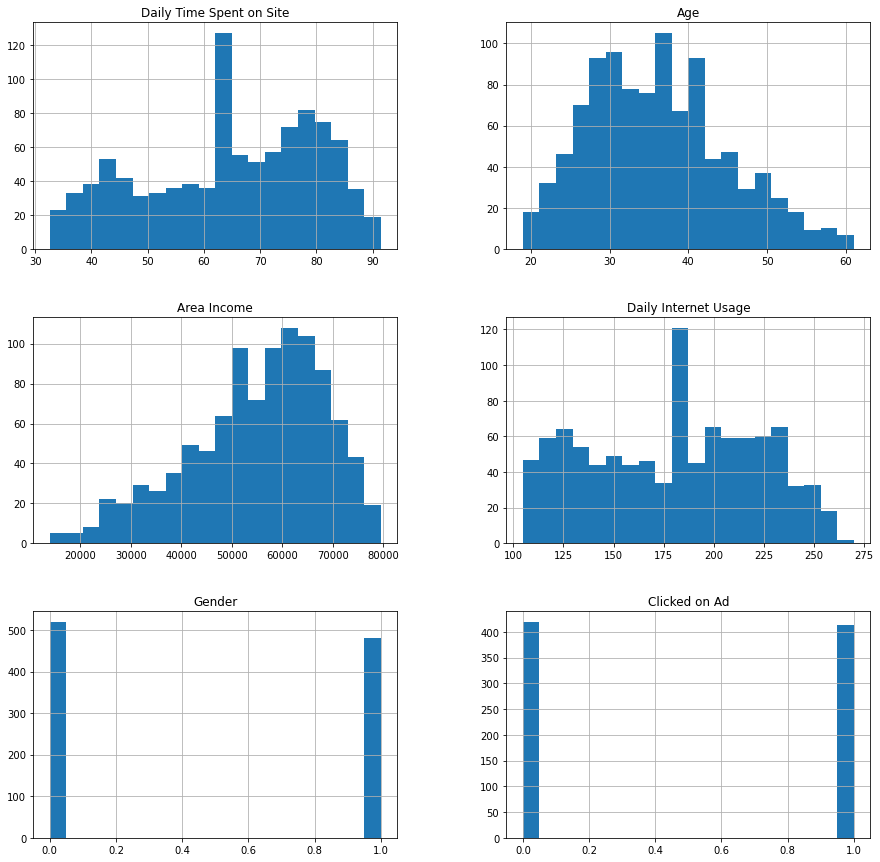

In [15]:
data_frame = data_frame.drop(columns = ['Unnamed: 0'])
data_frame.hist(bins = 20, figsize = (15, 15))

## Part Nine

### Data normalization
First we delete the non-numeric columnss and then for each numeric data we subtract that data minus the average of the the column and then divide by the standard deviation of the column to normalize.

In [16]:
data_frame = data_frame.drop(columns = ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'])

data_frame["Daily Time Spent on Site"] = (data_frame["Daily Time Spent on Site"] - data_frame["Daily Time Spent on Site"].mean()) / data_frame["Daily Time Spent on Site"].std()
data_frame["Age"] = (data_frame["Age"] - data_frame["Age"].mean()) / data_frame["Age"].std()
data_frame["Area Income"] = (data_frame["Area Income"] - data_frame["Area Income"].mean()) / data_frame["Area Income"].std()
data_frame["Daily Internet Usage"] = (data_frame["Daily Internet Usage"] - data_frame["Daily Internet Usage"].mean()) / data_frame["Daily Internet Usage"].std()

display(data_frame)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0
...,...,...,...,...,...
995,0.538051,-0.691441,1.221395,0.686394,1.0
996,-0.888164,1.034517,0.952853,-1.079309,1.0
997,-0.866445,1.724900,-0.938101,-1.413831,1.0
998,-0.608450,-1.957144,-0.974996,0.195207,0.0


## Part Ten
We choose "Daily Internet Usage" data, because the area of two clicked and did not clicked diagram is less than the rest of the diagrams, it is better and with less error to classify the data.

In [17]:
desired_data_1 = data_frame.groupby("Clicked on Ad").mean().reset_index()
desired_data_2 = data_frame.groupby("Clicked on Ad").std().reset_index()

### For Daily Time Spent on Site

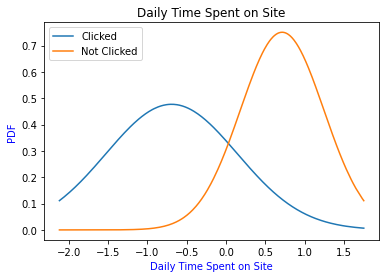

In [18]:
clicked_mean = desired_data_1.loc[1, "Daily Time Spent on Site"]
not_clicked_mean = desired_data_1.loc[0, "Daily Time Spent on Site"]

clicked_std = desired_data_2.loc[1, "Daily Time Spent on Site"]
not_clicked_std = desired_data_2.loc[0, "Daily Time Spent on Site"]

x = sorted(data_frame["Daily Time Spent on Site"])

y_clicked = sp.norm.pdf(x, clicked_mean, clicked_std)
y_not_clicked = sp.norm.pdf(x, not_clicked_mean, not_clicked_std)

plt.title("Daily Time Spent on Site")
plt.plot(x, y_clicked, label = "Clicked")
plt.plot(x, y_not_clicked, label = "Not Clicked")
plt.xlabel("Daily Time Spent on Site", color = "blue", size = 10)
plt.ylabel("PDF", color = "blue", size = 10)
plt.legend()
plt.show()

### For Age

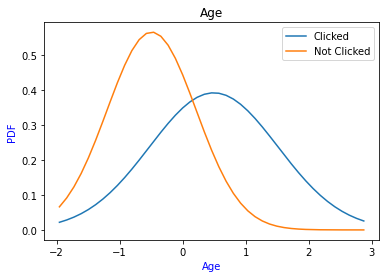

In [19]:
clicked_mean = desired_data_1.loc[1, "Age"]
not_clicked_mean = desired_data_1.loc[0, "Age"]

clicked_std = desired_data_2.loc[1, "Age"]
not_clicked_std = desired_data_2.loc[0, "Age"]

x = sorted(data_frame["Age"])

y_clicked = sp.norm.pdf(x, clicked_mean, clicked_std)
y_not_clicked = sp.norm.pdf(x, not_clicked_mean, not_clicked_std)

plt.title("Age")
plt.plot(x, y_clicked, label = "Clicked")
plt.plot(x, y_not_clicked, label = "Not Clicked")
plt.xlabel("Age", color = "blue", size = 10)
plt.ylabel("PDF", color = "blue", size = 10)
plt.legend()
plt.show()

### For Area Income

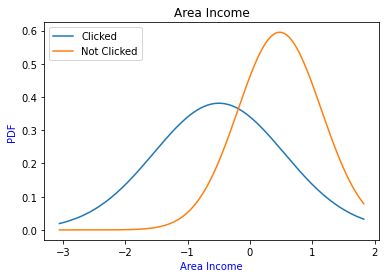

In [20]:
clicked_mean = desired_data_1.loc[1, "Area Income"]
not_clicked_mean = desired_data_1.loc[0, "Area Income"]

clicked_std = desired_data_2.loc[1, "Area Income"]
not_clicked_std = desired_data_2.loc[0, "Area Income"]

x = sorted(data_frame["Area Income"])

y_clicked = sp.norm.pdf(x, clicked_mean, clicked_std)
y_not_clicked = sp.norm.pdf(x, not_clicked_mean, not_clicked_std)

plt.title("Area Income")
plt.plot(x, y_clicked, label = "Clicked")
plt.plot(x, y_not_clicked, label = "Not Clicked")
plt.xlabel("Area Income", color = "blue", size = 10)
plt.ylabel("PDF", color = "blue", size = 10)
plt.legend()
plt.show()

### For Daily Internet Usage

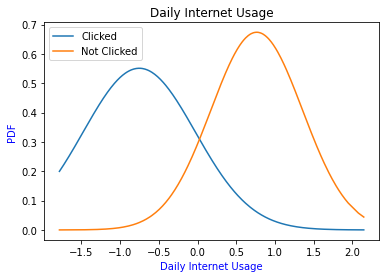

In [21]:
clicked_mean = desired_data_1.loc[1, "Daily Internet Usage"]
not_clicked_mean = desired_data_1.loc[0, "Daily Internet Usage"]

clicked_std = desired_data_2.loc[1, "Daily Internet Usage"]
not_clicked_std = desired_data_2.loc[0, "Daily Internet Usage"]

x = sorted(data_frame["Daily Internet Usage"])

y_clicked = sp.norm.pdf(x, clicked_mean, clicked_std)
y_not_clicked = sp.norm.pdf(x, not_clicked_mean, not_clicked_std)

plt.title("Daily Internet Usage")
plt.plot(x, y_clicked, label = "Clicked")
plt.plot(x, y_not_clicked, label = "Not Clicked")
plt.xlabel("Daily Internet Usage", color = "blue", size = 10)
plt.ylabel("PDF", color = "blue", size = 10)
plt.legend()
plt.show()

## Part Eleven
We store two mean and standard deviation data for boyh clicked and did not clicked modes for the selected column data (Daily Internet Usage). And put it in two PDFs clicked and not clicked. If the missing data is more likely to be one, we set it to one, otherwise we set it to zero.

In [22]:
desired_clicked_mean = desired_data_1.loc[1, "Daily Internet Usage"]
desired_not_clicked_mean = desired_data_1.loc[0, "Daily Internet Usage"]
desired_clicked_std = desired_data_2.loc[1, "Daily Internet Usage"]
desired_not_clicked_std = desired_data_2.loc[0, "Daily Internet Usage"]

probability_one = sp.norm(desired_clicked_mean, desired_clicked_std)
probability_zero = sp.norm(desired_not_clicked_mean, desired_not_clicked_std)
        
result = data_frame[data_frame["Clicked on Ad"].isnull()].copy()

result.loc[probability_zero.pdf(result["Daily Internet Usage"]) < probability_one.pdf(result["Daily Internet Usage"]), "Clicked on Ad"] = 1
result.loc[probability_zero.pdf(result["Daily Internet Usage"]) > probability_one.pdf(result["Daily Internet Usage"]), "Clicked on Ad"] = 0

display(result)           
result["Clicked on Ad"].to_csv("result.csv")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
10,-1.129048,1.494773,-0.698304,-1.374546,1.0
14,-1.437721,-0.346249,-1.790880,-0.861692,1.0
15,-0.088509,-1.496888,-0.210052,-0.931215,1.0
20,0.817766,-0.691441,0.730719,1.064011,0.0
24,-1.540393,0.574262,1.040827,-0.298362,1.0
...,...,...,...,...,...
963,-0.266210,0.689325,1.101465,1.602341,0.0
966,-1.791149,1.839964,-0.253420,-0.072649,1.0
967,0.211608,-1.266760,0.995775,0.204016,0.0
977,-0.646622,-0.576377,-0.231089,-1.508831,1.0


### Second way

In [23]:
for i in range(len(result)) :
    if result["Clicked on Ad"][result.index[i]] != 0 and result["Clicked on Ad"][result.index[i]] != 1 :
        if probability_zero.pdf(result["Daily Internet Usage"][result.index[i]]) < probability_one.pdf(result["Daily Internet Usage"][result.index[i]]) :
            result.loc[result.index[i], "Clicked on Ad"] = 1
        else :
            result.loc[result.index[i], "Clicked on Ad"] = 0
display(result) 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
10,-1.129048,1.494773,-0.698304,-1.374546,1.0
14,-1.437721,-0.346249,-1.790880,-0.861692,1.0
15,-0.088509,-1.496888,-0.210052,-0.931215,1.0
20,0.817766,-0.691441,0.730719,1.064011,0.0
24,-1.540393,0.574262,1.040827,-0.298362,1.0
...,...,...,...,...,...
963,-0.266210,0.689325,1.101465,1.602341,0.0
966,-1.791149,1.839964,-0.253420,-0.072649,1.0
967,0.211608,-1.266760,0.995775,0.204016,0.0
977,-0.646622,-0.576377,-0.231089,-1.508831,1.0


## Conclusion
We can not get desired result with bad and useless data, so it is necessary to classify the data based on the desired characteristics, to remove the outdated data. Also, we can not analyze a problem with missing data, so we need to replace the lost data by modeling it with the data closest to the missing data.

## Sources

https://www.geeksforgeeks.org
https://stackoverflow.com
https://pandas.pydata.org